# 의사결정나무 
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘 

### 문제 정의
서울 지역 (구)의 경도와 위도 정보를 사용하여 
임의로 입력된 지역(동)을 강동,강서,강남,강북으로 분류해보는 예제

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("../Data/seoul_district.csv")
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [3]:
test_df = pd.read_csv("../Data/seoul_dong.csv")
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [5]:
# 레이블의 갯수 확인
train_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [7]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

### 데이터 전처리

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   district   20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dong       20 non-null     object 
 1   longitude  20 non-null     float64
 2   latitude   20 non-null     float64
 3   label      20 non-null     object 
dtypes: float64(2), object(2)
memory usage: 768.0+ bytes


In [10]:
# 경도와 위도의 평균과 편차
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


> 경도와 위도의 동일한 단위를 사용 
> 의사결정나무는 각 특징을 독립적으로 사용하기 때문에 별다른 전처리 과정이 필용없다.(표준화)

# 데이터 시각화 

In [11]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [12]:
import seaborn as sns

In [18]:
import warnings
warnings.filterwarnings("ignore")

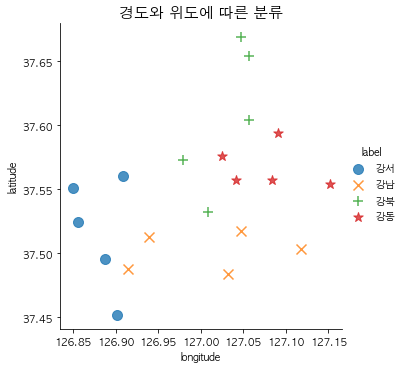

In [19]:
# train_df의 위도 경도에 해당하는 시각화 
sns.lmplot(
    'longitude',
    'latitude',
    data = train_df, 
    fit_reg = False, # 회귀선 그리기 
    markers=['o','x','+',"*"],
    scatter_kws= {'s' : 100}, # 좌표상의 점의 크기
    hue = 'label'     # 대상값
)
plt.title('경도와 위도에 따른 분류', size=15)
plt.show()

### 데이터 다듬기 
- train_df => district 제거 
- test_df => dong 제거
- X_train => 위도,경도
- y_train => 라벨
- X_test => 위도,경도
- y_test => 라벨

In [27]:
#train_df.drop("district",axis=1,inplace=True)
train_df

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서
5,126.915065,37.487517,강남
6,126.939300,37.512400,강남
7,127.032400,37.483700,강남
8,127.047300,37.517200,강남
9,127.117898,37.503510,강남


In [25]:
test_df.drop("dong",axis=1,inplace=True)
test_df

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서
5,127.030720,37.508838,강남
6,127.057193,37.501163,강남
7,127.018281,37.486401,강남
8,126.988194,37.483279,강남
9,127.043159,37.492896,강남


In [38]:
# 필요한 열 추출하기
X_train = train_df[['longitude','latitude']]
y_train = train_df['label']

In [39]:
X_test = test_df[['longitude','latitude']]
y_test = test_df['label']

In [40]:
# 의사결정나무로 학습시키기 
# random state = 35

In [41]:
from sklearn import tree

In [42]:
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train,y_train)

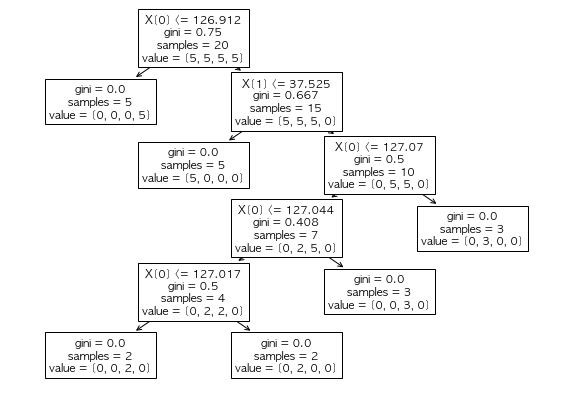

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(clf)
plt.show()

> gini : 불순도 
> 최종노드는 gini가 0이다 